In [1]:
import numpy as np
import matplotlib.pyplot as plt
from arc import Arc
from losange import Losange
import os
os.chdir(os.path.dirname(os.path.abspath('__file__')))

import jax.numpy as jnp
import jax

In [2]:
center = 200
wid = 200
hei = 300
b_border = 350
base = (b_border, center)
left = (b_border -100, center-int(wid/2))
right = (b_border -100, center+int(wid/2))
top = (b_border - hei, center)
lcenter = (390, 100)
rcenter = (390, 300)
arc = Arc(lcenter, top_point=left, bottom_point=base)
img = np.ones((400, 400, 3), dtype = "uint8") * 255

In [3]:
%%timeit
arc.render_vanilla(img)

259 μs ± 1.87 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
%%timeit
arc.render_vectorized(img)

106 μs ± 2.48 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [5]:
%%timeit
arc.render_bresenham(img)

246 μs ± 25.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [3]:
img = jnp.ones((400, 400, 3), dtype = "uint8") * 255

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



W0000 00:00:1729564234.567399 4447505 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1729564234.581468 4447505 service.cc:145] XLA service 0x1071ea600 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729564234.581482 4447505 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1729564234.582859 4447505 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1729564234.582873 4447505 mps_client.cc:384] XLA backend will use up to 22906109952 bytes on device 0 for SimpleAllocator.


In [4]:
%%timeit
arc.render_jax(img)

/opt/homebrew/lib/python3.12/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=int32 to dtype=uint8 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


1.89 ms ± 45.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [3]:
x_range = jnp.arange(-arc.a, arc.a + 1)
y_range = jnp.arange(-arc.b, arc.b + 1)

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



W0000 00:00:1729342914.381566 4086210 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1729342914.398460 4086210 service.cc:145] XLA service 0x1274045f0 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729342914.398492 4086210 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1729342914.400108 4086210 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1729342914.400119 4086210 mps_client.cc:384] XLA backend will use up to 22906109952 bytes on device 0 for SimpleAllocator.


In [4]:
x_range = jnp.arange(-arc.a, arc.a + 1)
xmax = max(arc.tp[0],arc.bp[0])
xmin = min(arc.tp[0],arc.bp[0])
ymax = max(arc.tp[1],arc.bp[1])
ymin = min(arc.tp[1],arc.bp[1])
x_in_bounds = (x_range + arc.center[0] <= xmax) & (x_range + arc.center[0] >= xmin)
x_range = x_range[x_in_bounds]
y_range = jnp.arange(-arc.b, arc.b + 1)
y_in_bounds = (y_range + arc.center[1] <= ymax) & (y_range + arc.center[1] >= ymin)
y_range = y_range[y_in_bounds]

In [5]:
yp = arc.b * jnp.sqrt(1 - (x_range/arc.a)**2)
ym = -yp


In [6]:
xp = arc.a * jnp.sqrt(1 - (y_range/arc.b)**2)
xm = -xp



In [7]:
# get the x_range, yp pairs for yp in y_range
yp_in_bounds = (yp + arc.center[1] <= ymax) & (yp + arc.center[1] >= ymin)
yp_pairs = jnp.array([x_range, yp]).T[yp_in_bounds]
# get the x_range, ym pairs for ym in y_range
ym_in_bounds = (ym + arc.center[1] <= ymax) & (ym + arc.center[1] >= ymin)
ym_pairs = jnp.array([x_range, ym]).T[ym_in_bounds]

# get the x_range, yp pairs for yp in y_range
xp_in_bounds = (xp + arc.center[0] <= xmax) & (xp + arc.center[0] >= xmin)
xp_pairs = jnp.array([xp, y_range]).T[xp_in_bounds]
# get the x_range, ym pairs for ym in y_range
xm_in_bounds = (xm + arc.center[0] <= xmax) & (xm + arc.center[0] >= xmin)
xm_pairs = jnp.array([xm, y_range]).T[xm_in_bounds]

In [10]:
merged_pairs[:, 0]

Array([-140., -139., -138., -137., -136., -135., -134., -133., -132.,
       -131., -130., -129., -128., -127., -126., -125., -124., -123.,
       -122., -121., -120., -119., -118., -117., -116., -115., -114.,
       -113., -112., -111., -110., -109., -108., -107., -106., -105.,
       -104., -103., -102., -101., -100.,  -99.,  -98.,  -97.,  -96.,
        -95.,  -94.,  -93.,  -92.,  -91.,  -90.,  -89.,  -88.,  -87.,
        -86.,  -85.,  -84.,  -83.,  -82.,  -81.,  -80.,  -79.,  -78.,
        -77.,  -76.,  -75.,  -74.,  -73.,  -72.,  -71.,  -70.,  -69.,
        -68.,  -67.,  -66.,  -65.,  -64.,  -63.,  -62.,  -61.,  -60.,
        -59.,  -58.,  -57.,  -56.,  -55.,  -54.,  -53.,  -52.,  -51.,
        -50.,  -49.,  -48.,  -47.,  -46.,  -45.,  -44.,  -43.,  -42.,
        -41.,  -40., -140., -139., -138., -137., -136., -135., -134.,
       -133., -132., -131., -130., -129., -128., -127., -126., -125.,
       -124., -123., -122., -121., -120., -119., -118., -117., -116.,
       -115., -114.,

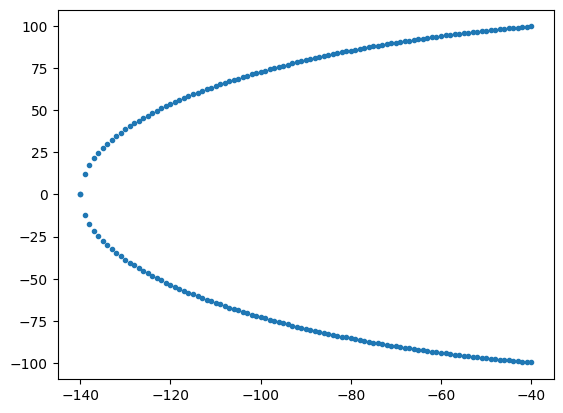

In [13]:
pair_p = jnp.array([x_range, ym]).T
pair_m = jnp.array([x_range, yp]).T
merged_pairs = jnp.concatenate([pair_p, pair_m])
plt.plot(merged_pairs[:, 0], merged_pairs[:, 1], '.')
plt.show()


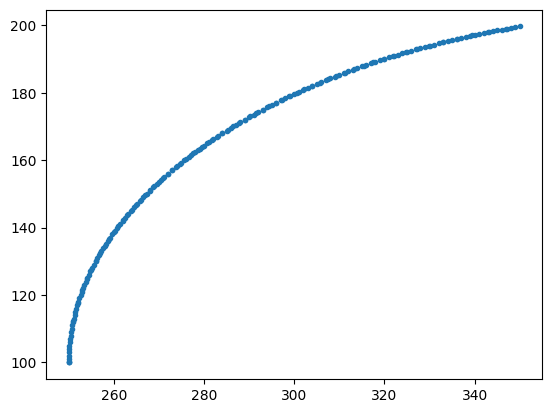

In [22]:
# merge the content of yp_pairs, ym_pairs, xp_pairs, xm_pairs such that there are no duplicate points
merged_pairs = jnp.concatenate([yp_pairs, ym_pairs, xp_pairs, xm_pairs])
# sort the merged_pairs such that the x values are in ascending order
merged_pairs = merged_pairs[merged_pairs[:, 0].argsort()]
# add the center point to the merged_pairs
merged_pairs = merged_pairs + jnp.array(arc.center)
merged_pairs = merged_pairs.astype(int)
# remove duplicates rows
merged_pairs = np.unique(merged_pairs, axis=0)

plt.plot(merged_pairs[:, 0], merged_pairs[:, 1], '.')
plt.show()



In [16]:
print(yp_in_bounds.sum())
print(ym_in_bounds.sum())
print(xp_in_bounds.sum())
print(xm_in_bounds.sum())

101
1
0
100


In [25]:
merged_pairs = merged_pairs.astype(int)
# remove duplicates rows
merged_pairs = np.unique(merged_pairs, axis=0)
merged_pairs

array([[250, 100],
       [250, 101],
       [250, 102],
       [250, 103],
       [250, 104],
       [250, 105],
       [250, 106],
       [250, 107],
       [250, 108],
       [250, 109],
       [250, 110],
       [250, 111],
       [250, 112],
       [251, 112],
       [251, 113],
       [251, 114],
       [251, 115],
       [251, 116],
       [251, 117],
       [252, 117],
       [252, 118],
       [252, 119],
       [252, 120],
       [252, 121],
       [253, 121],
       [253, 122],
       [253, 123],
       [253, 124],
       [254, 124],
       [254, 125],
       [254, 126],
       [254, 127],
       [255, 127],
       [255, 128],
       [255, 129],
       [255, 130],
       [256, 130],
       [256, 131],
       [256, 132],
       [257, 132],
       [257, 133],
       [257, 134],
       [258, 134],
       [258, 135],
       [258, 136],
       [259, 136],
       [259, 137],
       [259, 138],
       [260, 138],
       [260, 139],
       [260, 140],
       [261, 140],
       [261,